In [210]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import numpy as np
from datetime import datetime
import xarray.ufuncs as xu
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default='notebook'
import cmocean.cm as cm
import dask.array as da
import scipy.io
from scipy import signal
import os
from dask.distributed import Client
client = Client()
client

C:\ProgramData\Anaconda3\envs\estuary\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63172 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:63172/status,
Dashboard: http://127.0.0.1:63172/status,Workers: 4
Total threads: 16,Total memory: 63.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63173,Workers: 4
Dashboard: http://127.0.0.1:63172/status,Total threads: 16
Started: Just now,Total memory: 63.20 GiB
Comm: tcp://127.0.0.1:63207,Total threads: 4
Dashboard: http://127.0.0.1:63209/status,Memory: 15.80 GiB
Nanny: tcp://127.0.0.1:63177,


In [15]:
url = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/users/scook/proj/DE_Bay/run07/run07C/ocean_deb_his_run07C_tsvar_00006.nc'
ds = xr.open_dataset(url, chunks={'ocean_time':1})
ds

<xarray.Dataset>
Dimensions:          (boundary: 4, eta_psi: 1369, eta_rho: 1370, eta_u: 1370, eta_v: 1369, ocean_time: 720, s_rho: 16, s_w: 17, tracer: 5, xi_psi: 183, xi_rho: 184, xi_u: 183, xi_v: 184)
Coordinates:
  * s_rho            (s_rho) float64 -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 -1.0 -0.9375 -0.875 ... -0.125 -0.0625 0.0
    lon_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lat_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lon_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lat_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lon_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lat_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lon_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
    lat_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
  * ocean_time       (ocean_time) datetime64[ns] 2019-05-31T01:00:00 ... 2019...
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes           int32 ...
    ndtfast          int32 ...
    dt               float64 ...
    dtfast           float64 ...
    dstart           datetime64[ns] ...
    nHIS             int32 ...
    ndefHIS          int32 ...
    nRST             int32 ...
    Falpha           float64 ...
    Fbeta            float64 ...
    Fgamma           float64 ...
    nl_tnu2          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    nl_visc2         float64 ...
    LuvSponge        int32 ...
    LtracerSponge    (tracer) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    Akt_bak          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Akv_bak          float64 ...
    Akk_bak          float64 ...
    Akp_bak          float64 ...
    rdrg             float64 ...
    rdrg2            float64 ...
    Zob              float64 ...
    Zos              float64 ...
    gls_p            float64 ...
    gls_m            float64 ...
    gls_n            float64 ...
    gls_cmu0         float64 ...
    gls_c1           float64 ...
    gls_c2           float64 ...
    gls_c3m          float64 ...
    gls_c3p          float64 ...
    gls_sigk         float64 ...
    gls_sigp         float64 ...
    gls_Kmin         float64 ...
    gls_Pmin         float64 ...
    Charnok_alpha    float64 ...
    Zos_hsig_alpha   float64 ...
    sz_alpha         float64 ...
    CrgBan_cw        float64 ...
    Znudg            float64 ...
    M2nudg           float64 ...
    M3nudg           float64 ...
    Tnudg            (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Tnudg_SSS        float64 ...
    FSobc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    FSobc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    Tobc_in          (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    Tobc_out         (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    M3obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M3obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    rho0             float64 ...
    R0               float64 ...
    Tcoef            float64 ...
    Scoef            float64 ...
    gamma2           float64 ...
    LuvSrc           int32 ...
    LwSrc            int32 ...
    LtracerSrc       (tracer) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    LsshCLM     

### import locally (decrease computation time)

In [209]:
path = 'salt.nc'
ds = xr.open_dataset(path, chunks={'ocean_time':1})
# dist_mile = xr.DataArray(dist_mile,dims=['points'])
# ds = xr.Dataset(ds, coords={'dist_mile': dist_mile})
ds

<xarray.Dataset>
Dimensions:     (s_rho: 16, points: 1370, ocean_time: 720)
Coordinates:
  * s_rho       (s_rho) float64 -0.9688 -0.9062 -0.8438 ... -0.09375 -0.03125
    lon_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, s_rho, points) float32 dask.array<chunksize=(1, 16, 1370), meta=np.ndarray>

### define river mile coors

In [16]:
river_mile_coords = pd.read_csv('river_mile_coords.csv', index_col=0 )
target_x = np.array(river_mile_coords.iloc[:,[1]].values).squeeze()
target_x = xr.DataArray(target_x-1, dims=["dist_miles"]) 
target_y = np.array(river_mile_coords.iloc[:,[2]].values).squeeze()
target_y = xr.DataArray(target_y-1,dims=["dist_miles"])

In [17]:
dist_mile = np.array(river_mile_coords.iloc[:,[0]].values)
dist_mile = dist_mile.squeeze()
dist_mile = xr.DataArray(dist_mile,dims=['points']) #change to points
dist_mile = dist_mile.values
dist_mile

array([ -6.86446808,  -6.73695053,  -6.60944252, ..., 134.16375535,
       134.32597435, 134.48806645])

### select bottom values

In [21]:
ds = ds.isel(s_rho=0)

### subset river miles

In [18]:
ds = ds.isel(xi_rho=target_x, eta_rho=target_y)

### assign river miles as new coordinates

In [19]:
dist_mile = xr.DataArray(dist_mile,dims=['points'])

In [20]:
ds = xr.Dataset(ds, coords={'dist_mile': dist_mile})
ds

<xarray.Dataset>
Dimensions:          (boundary: 4, dist_miles: 1370, eta_psi: 1369, eta_u: 1370, eta_v: 1369, ocean_time: 720, points: 1370, s_rho: 16, s_w: 17, tracer: 5, xi_psi: 183, xi_u: 183, xi_v: 184)
Coordinates:
  * s_rho            (s_rho) float64 -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 -1.0 -0.9375 -0.875 ... -0.125 -0.0625 0.0
    lon_rho          (dist_miles) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho          (dist_miles) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lon_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lat_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lon_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lat_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lon_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
    lat_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
  * ocean_time       (ocean_time) datetime64[ns] 2019-05-31T01:00:00 ... 2019...
    dist_mile        (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: boundary, dist_miles, eta_psi, eta_u, eta_v, points, tracer, xi_psi, xi_u, xi_v
Data variables:
    ntimes           int32 ...
    ndtfast          int32 ...
    dt               float64 ...
    dtfast           float64 ...
    dstart           datetime64[ns] ...
    nHIS             int32 ...
    ndefHIS          int32 ...
    nRST             int32 ...
    Falpha           float64 ...
    Fbeta            float64 ...
    Fgamma           float64 ...
    nl_tnu2          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    nl_visc2         float64 ...
    LuvSponge        int32 ...
    LtracerSponge    (tracer) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    Akt_bak          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Akv_bak          float64 ...
    Akk_bak          float64 ...
    Akp_bak          float64 ...
    rdrg             float64 ...
    rdrg2            float64 ...
    Zob              float64 ...
    Zos              float64 ...
    gls_p            float64 ...
    gls_m            float64 ...
    gls_n            float64 ...
    gls_cmu0         float64 ...
    gls_c1           float64 ...
    gls_c2           float64 ...
    gls_c3m          float64 ...
    gls_c3p          float64 ...
    gls_sigk         float64 ...
    gls_sigp         float64 ...
    gls_Kmin         float64 ...
    gls_Pmin         float64 ...
    Charnok_alpha    float64 ...
    Zos_hsig_alpha   float64 ...
    sz_alpha         float64 ...
    CrgBan_cw        float64 ...
    Znudg            float64 ...
    M2nudg           float64 ...
    M3nudg           float64 ...
    Tnudg            (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Tnudg_SSS        float64 ...
    FSobc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    FSobc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    Tobc_in          (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    Tobc_out         (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    M3obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M3obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    rho0             float64 ...
    R0               float64 ...
    Tcoef            float64 ...
    Scoef            float64 ...
    gamma2           float64 ...
    LuvSrc           int32 ...
    LwSrc            int32 ...
    LtracerSrc       (trac

In [22]:
salt

<xarray.DataArray 'salt' (ocean_time: 720, dist_miles: 1370)>
dask.array<getitem, shape=(720, 1370), dtype=float32, chunksize=(1, 1370), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (dist_miles) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho     (dist_miles) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-05-31T01:00:00 ... 2019-06-30
Dimensions without coordinates: dist_miles
Attributes:
    long_name:  salinity
    time:       ocean_time
    grid:       grid
    location:   face
    field:      salinity, scalar, series

In [23]:
saltfront = salt.where(salt < 0.52).where(salt > 0.51)
salfront = saltfront.where(saltfront.max('ocean_time'))

### subset salt variable

In [ ]:
salfront_location = saltfront.salt

### convert to DataFrame

In [ ]:
# saltfront_location= saltfront.to_dataframe()
saltfront_location= saltfront_location.to_dataframe()
saltfront_location

### Datastructure

In [220]:
df = saltfront_location[saltfront_location['salt'].notna()]
df = df.droplevel(level=1)
df

,s_rho,lon_rho,lat_rho,dist_mile,salt
ocean_time,,,,,
2019-09-28 02:00:00,-0.96875,-75.409034,39.807939,79.185240,0.514313
2019-09-28 02:00:00,-0.96875,-75.408179,39.808519,79.251298,0.512174
2019-09-28 03:00:00,-0.96875,-75.386823,39.820431,80.794789,0.516436
2019-09-28 04:00:00,-0.96875,-75.347027,39.842247,83.647922,0.519163
2019-09-28 04:00:00,-0.96875,-75.345878,39.842702,83.721712,0.514050
...,...,...,...,...,...
2019-10-27 19:00:00,-0.96875,-75.333459,39.847749,84.483010,0.517190
2019-10-27 20:00:00,-0.96875,-75.371609,39.828046,81.858909,0.512234
2019-10-27 21:00:00,-0.96875,-75.399804,39.809850,79.710148,0.517799


In [221]:
df = df.resample('1D').mean()
df

,s_rho,lon_rho,lat_rho,dist_mile,salt
ocean_time,,,,,
2019-09-28,-0.96875,-75.383521,39.820588,80.952996,0.514530
2019-09-29,-0.96875,-75.375344,39.824451,81.512187,0.515184
2019-09-30,-0.96875,-75.359667,39.827045,82.412903,0.515213
2019-10-01,-0.96875,-75.345774,39.831598,83.283082,0.514956
2019-10-02,-0.96875,-75.357283,39.829902,82.628774,0.514394
2019-10-03,-0.96875,-75.354388,39.830434,82.800818,0.515585
2019-10-04,-0.96875,-75.299376,39.844502,86.100251,0.514963
2019-10-05,-0.96875,-75.319249,39.840083,84.939771,0.514766
2019-10-06,-0.96875,-75.323028,39.840144,84.751451,0.515470


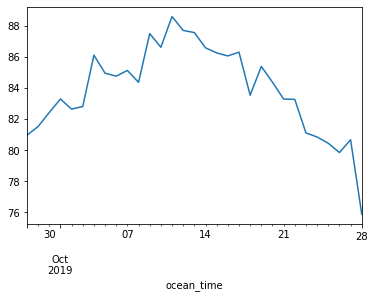

In [222]:
df['dist_mile'].plot()

### Load csv

In [338]:
jan = pd.read_csv('salt_jan.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
jan['date'] = pd.to_datetime(jan.index)

feb = pd.read_csv('salt_feb.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
feb['date'] = pd.to_datetime(feb.index)

mar = pd.read_csv('salt_mar.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
mar['date'] = pd.to_datetime(mar.index)

apr = pd.read_csv('salt_apr.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
apr['date'] = pd.to_datetime(apr.index)


may = pd.read_csv('salt_may.csv', index_col=0 )
# may['date'] = may['ocean_time']
may['date'] = pd.to_datetime(may.index)

jun = pd.read_csv('salt_jun.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
jun['date'] = pd.to_datetime(jun.index)

jul = pd.read_csv('salt_jul.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
jul['date'] = pd.to_datetime(jul.index)

aug = pd.read_csv('salt_aug.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
aug['date'] = pd.to_datetime(aug.index)

sep = pd.read_csv('salt_sep.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
sep['date'] = pd.to_datetime(sep.index)

octb = pd.read_csv('salt_oct.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
octb['date'] = pd.to_datetime(octb.index)

nov = pd.read_csv('salt_nov.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
nov['date'] = pd.to_datetime(nov.index)

dec = pd.read_csv('salt_dec.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
dec['date'] = pd.to_datetime(dec.index)

jan_2020 = pd.read_csv('salt_jan_2020.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
jan_2020['date'] = pd.to_datetime(jan_2020.index)

feb_2020 = pd.read_csv('salt_feb_2020.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
feb_2020['date'] = pd.to_datetime(feb_2020.index)

mar_2020 = pd.read_csv('salt_mar_2020.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
mar_2020['date'] = pd.to_datetime(mar_2020.index)

mar_end_2020 = pd.read_csv('salt_mar_end_2020.csv', index_col=0 )
# apr['date'] = apr['ocean_time']
mar_end_2020['date'] = pd.to_datetime(mar_end_2020.index)

In [126]:
df

,s_rho,lon_rho,lat_rho,dist_mile,salt,date,year
ocean_time,,,,,,,
2019-04-01,-0.96875,-75.556879,39.505655,54.504144,0.516200,2019-04-01,2019
2019-04-01,-0.96875,-75.553549,39.508465,54.672748,0.511699,2019-04-01,2019
2019-04-01,-0.96875,-75.552808,39.576616,59.450876,0.514051,2019-04-01,2019
2019-04-02,-0.96875,-75.542149,39.544837,57.162045,0.512893,2019-04-02,2019
2019-04-02,-0.96875,-75.559411,39.586352,60.152001,0.518423,2019-04-02,2019
...,...,...,...,...,...,...,...
2019-04-30,-0.96875,-75.563475,39.477314,52.527950,0.512232,2019-04-30,2019
2019-04-30,-0.96875,-75.563185,39.482319,52.884365,0.515516,2019-04-30,2019
2019-04-30,-0.96875,-75.544794,39.562840,58.440056,0.515010,2019-04-30,2019


In [66]:
test = pd.read_csv('salt_jan.csv', index_col=0 )
test['date'] = pd.to_datetime(test.index)
test = test.reset_index('ocean_time')
test

,ocean_time,s_rho,lon_rho,lat_rho,dist_mile,salt,date
0,2019-01-01,-0.96875,-75.551200,39.518144,55.346038,0.510339,2019-01-01
1,2019-01-01,-0.96875,-75.541183,39.547171,57.320521,0.517988,2019-01-01
2,2019-01-01,-0.96875,-75.540310,39.551727,57.645811,0.513515,2019-01-01
3,2019-01-01,-0.96875,-75.540391,39.553963,57.819250,0.514065,2019-01-01
4,2019-01-01,-0.96875,-75.546910,39.565109,58.595096,0.512840,2019-01-01
...,...,...,...,...,...,...,...
125,2019-01-29,-0.96875,-75.563521,39.483992,53.005574,0.514720,2019-01-29
126,2019-01-30,-0.96875,-75.532833,39.431072,48.718854,0.516366,2019-01-30
127,2019-01-30,-0.96875,-75.554968,39.450204,50.522262,0.513499,2019-01-30
128,2019-01-30,-0.96875,-75.555371,39.451551,50.610863,0.516036,2019-01-30


## Set up data for polar plotting

In [41]:
# Add datetime column
df['date'] = pd.to_datetime(df.index)

In [42]:
# Prep dummy data - from 2018-01-01 to 2019-09-27 (ends before start of data in df - October 2019)
df_mult_years = pd.DataFrame({'date':pd.date_range(start='2018-01-01', end='2019-09-27')})
df_mult_years.index = df_mult_years.date
df_mult_years['dist_mile'] = np.random.randint(70,92,df_mult_years.shape[0]) #np.nan

In [43]:
# Prep dummy data - from 2019-10-29 to 2019-12-31 (picks up after end of data in df - October 2019)
df_mult_years_end = pd.DataFrame({'date':pd.date_range(start='2019-10-29', end='2019-12-31')})
df_mult_years_end.index = df_mult_years_end.date
df_mult_years_end['dist_mile'] = np.random.randint(70,92,df_mult_years_end.shape[0]) # np.nan

In [339]:
# Concatenate the data into a single continous dataframe (2 years of data)
# df_plot = pd.concat([df_mult_years, df[['date','dist_mile']], df_mult_years_end])
# df_plot = pd.concat([df_mult_years, apr[['date','dist_mile']],may[['date','dist_mile']]])
# df_plot = pd.concat( [jan[['date','dist_mile']], feb[['date','dist_mile']], mar[['date','dist_mile']], 
#                       apr[['date','dist_mile']], may[['date','dist_mile']], jun[['date','dist_mile']],
#                      jul[['date','dist_mile']], aug[['date','dist_mile']], sep[['date','dist_mile']],
#                      octb[['date','dist_mile']], nov[['date','dist_mile']], dec[['date','dist_mile']],
#                      jan_2020[['date','dist_mile']], feb_2020[['date','dist_mile']], mar_2020[['date','dist_mile']],
#                      mar_end_2020[['date','dist_mile']]])
df_plot = pd.concat( [jan[['date','dist_mile']], feb[['date','dist_mile']], mar[['date','dist_mile']], 
                      apr[['date','dist_mile']], may[['date','dist_mile']], jun[['date','dist_mile']],
                     jul[['date','dist_mile']], aug[['date','dist_mile']], sep[['date','dist_mile']],
                     octb[['date','dist_mile']], nov[['date','dist_mile']], dec[['date','dist_mile']]])
# df_plot = pd.concat([df_mult_years, apr[[apr.index, 'dist_mile']],may[[may.index,'dist_mile']]])
# df_plot = df
df_plot['year'] = df_plot.date.dt.year # Add column for year

In [340]:
# Get list of years represented in the dataset
years_list = df_plot.year.unique()
years_list

array([2019], dtype=int64)

In [301]:
df_salt = pd.concat( [jan, feb, mar, 
                      apr, may, jun,
                     jul, aug, sep,
                     octb, nov, dec,
                     jan_2020, feb_2020, mar_2020,
                     mar_end_2020])
year_df_idx = pd.date_range(f'01-01-{years_list[0]}',f'12-31-{years_list[-1]}')
df_salt.index = pd.DatetimeIndex(df_salt.index)
df_salt.date = pd.DatetimeIndex(df_salt.date)
# df_plot = df_plot.reindex(year_df_idx, fill_value=np.nan)
df_salt['date'] = pd.to_datetime(df_salt.index)

In [341]:
# Make sure the data covers complete years for all years in the dataset
year_df_idx = pd.date_range(f'01-01-{years_list[0]}',f'12-31-{years_list[-1]}')
df_plot.index = pd.DatetimeIndex(df_plot.index)
df_plot.date = pd.DatetimeIndex(df_plot.date)
# df_plot = df_plot.reindex(year_df_idx, fill_value=np.nan)
df_plot['date'] = pd.to_datetime(df_plot.index)

In [342]:
# Add time-related columns
df_plot['year'] = df_plot.date.dt.year # Add column for year
df_plot['mdate'] = mdates.date2num(df_plot.index.to_pydatetime()) # Convert dates to matplotlib dates
df_plot['tnorm'] = np.nan # for now, set normalized time column to NaN
df_plot['doy'] = df_plot.date.dt.dayofyear # compute doy #option 2
df_plot['doy_norm'] = np.nan # for now, set normalized doy column to NaN

In [343]:
# For each year in the dataset
for year in years_list:
    year_df =  df_plot.loc[df_plot['year']==year]
    # normalize dates for that year to circle (2pi radians)
    df_plot.loc[df_plot['year']==year, 'tnorm'] = (year_df['mdate']-year_df['mdate'].min())/(year_df['mdate'].max()-year_df['mdate'].min())*2.*np.pi
    # normalize DOY for that year to circle (2pi radians)
    df_plot.loc[df_plot['year']==year, 'doy_norm'] = (year_df['doy']-year_df['doy'].min())/(year_df['doy'].max()-year_df['doy'].min())*2.*np.pi

In [344]:
# Use an arbitrary year to get a set of dates for labeling at 8 places around polar chart
# dates_df = pd.DataFrame({'date':pd.date_range(start='2019-01-01', end='2019-12-31')})
dates_df = pd.DataFrame({'date':pd.date_range(start='2019-01-01', end='2019-12-26')})
date_labels = []
for i in range(0,8):
    date_labels.append(dates_df.iloc[round((dates_df.shape[0]/8)*i)].date.strftime("%m/%d"))
date_labels

['01/01', '02/15', '04/01', '05/16', '06/30', '08/14', '09/28', '11/12']

In [345]:
# Get series representing Wilmington river mile
rm_Wilmington = df_plot.copy()
rm_Wilmington['dist_mile'] = 70

In [346]:
# Get series representing south Philadelphia river mile
rm_Philadelphia = df_plot.copy()
rm_Philadelphia['dist_mile'] = 91

In [347]:
# Get series representing north Philadelphia river mile
rm_Philadelphia_max = df_plot.copy()
rm_Philadelphia_max['dist_mile'] = 110

In [348]:
# Set y bound (y axis limits) to be used in the plot
# y_bounds = [df.dist_mile.min()-8, df.dist_mile.max()+5]
y_bounds = [df_plot.dist_mile.min()-8, df_plot.dist_mile.max()+5]
y_bounds

[38.77466698064672, 93.58496888557525]

C:\Users\TTHOMP~1\AppData\Local\Temp\1/ipykernel_23920/4109311998.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(date_labels)


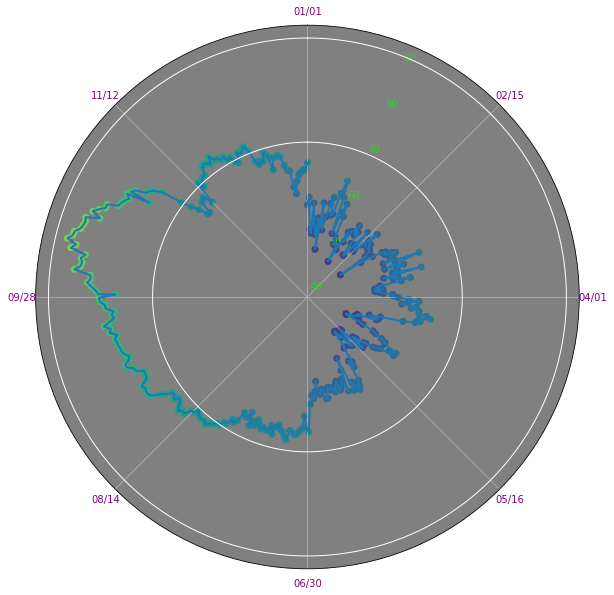

<Figure size 432x288 with 0 Axes>

In [352]:
# Plot w/ normalized date
import matplotlib.colors
import matplotlib.cm

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111, projection='polar')
ax1.set_theta_direction(-1)
ax1.set_theta_zero_location("N")
# colors= matplotlib.cm.viridis
# cmap= matplotlib.colors.ListedColormap(colors)
# norm = matplotlib.colors.Normalize(vmin=37, vmax=100)  
# cmap=cmap=plt.cm.get_cmap('cmo.haline')
for year in  years_list:
    ax1.plot(df_plot.loc[df_plot['year']==year].tnorm,df_plot.loc[df_plot['year']==year].dist_mile, linewidth=2)
    ax1.scatter(df_plot.loc[df_plot['year']==year].doy_norm, df_plot.loc[df_plot['year']==year].dist_mile, c=df_plot.loc[df_plot['year']==year].dist_mile, vmin=37, vmax=100)
# ax1.plot(df_plot['tnorm'],df_plot['dist_mile'], linewidth=2)
ax1.plot(rm_Wilmington['tnorm'],rm_Wilmington['dist_mile'] , linewidth=1, color='white')
ax1.plot(rm_Philadelphia['tnorm'],rm_Philadelphia['dist_mile'] , linewidth=1, color='white')
# ax1.plot(rm_Philadelphia_max['tnorm'],rm_Philadelphia_max['dist_mile'] , linewidth=1, color='white')
# ax1.fill_between(rm_Philadelphia_max['tnorm'],rm_Philadelphia['dist_mile'],rm_Philadelphia_max['dist_mile'], color='white', alpha=0.4)
# ax1.set_rorigin(-5)
ax1.tick_params(axis='y', colors='limegreen')
ax1.tick_params(axis='x', colors='purple')
ax1.set_ylim(y_bounds)
ax1.set_xticklabels(date_labels)
# ax1.set_yticklabels([])
ax1.set_facecolor('grey')
ax1.grid(False, axis='y')
# ax2 = fig.add_subplot(232, sharey=ax1)
# ax2.set_ylim(y_bounds)
# ax2.plot([0,0],y_bounds)
# ax2.set_yticks(y_bounds)
# ax2.set_yticklabels([round(y_bounds[0],0), round(y_bounds[1],0)])
# ax2.axis('off')
plt.show()
# ax.plot(df.index, df.salt) #doesn't seem to a registering the dates
# ax.set_rmin(0.5)
# ax.set_rmax(0.52)
plt.savefig('polar_plot_saltfront.png')

In [283]:
df_plot.dist_mile.min()

45.37331847094633

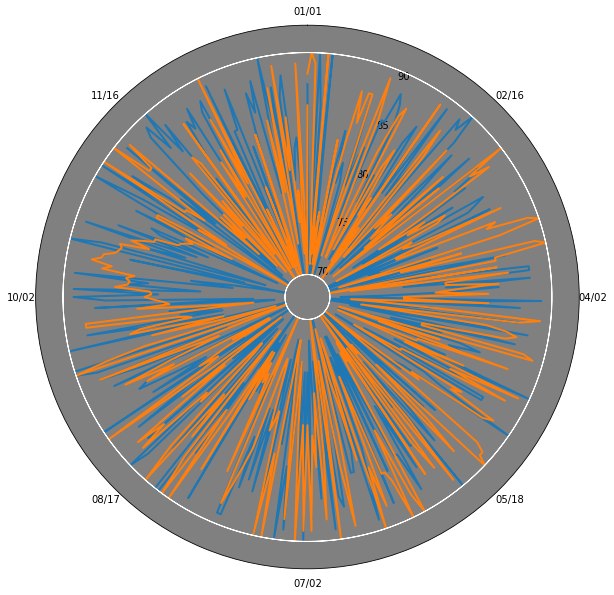

In [238]:
# Plot w/ normalized doy

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111, projection='polar')
ax1.set_theta_direction(-1)
ax1.set_theta_zero_location("N")
for year in  years_list:
    ax1.plot(df_plot.loc[df_plot['year']==year].doy_norm,df_plot.loc[df_plot['year']==year].dist_mile, linewidth=2)
# ax1.plot(df_plot['doy_norm'],df_plot['dist_mile'], linewidth=2)
ax1.plot(rm_Wilmington['tnorm'],rm_Wilmington['dist_mile'] , linewidth=1, color='white')
ax1.plot(rm_Philadelphia['tnorm'],rm_Philadelphia['dist_mile'] , linewidth=1, color='white')
ax1.set_ylim(y_bounds)
ax1.set_xticklabels(date_labels)
# ax1.set_yticklabels([])
ax1.set_facecolor('grey')
ax1.grid(False)
# ax2 = fig.add_subplot(232, sharey=ax1)
# ax2.set_ylim(y_bounds)
# ax2.plot([0,0],y_bounds)
# ax2.set_yticks(y_bounds)
# ax2.set_yticklabels([round(y_bounds[0],0), round(y_bounds[1],0)])
# ax2.axis('off')
plt.show()
# ax.plot(df.index, df.salt) #doesn't seem to a registering the dates
# ax.set_rmin(0.5)
# ax.set_rmax(0.52)

<AxesSubplot:xlabel='ocean_time'>

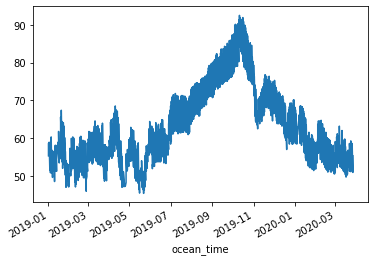

In [184]:
df_plot['dist_mile'].plot()

In [192]:
df_plot

,date,dist_mile,year,mdate,tnorm,doy,doy_norm
ocean_time,,,,,,,
2019-01-01,2019-01-01,55.346038,2019,17897.0,0.000000,1,0.000000
2019-01-01,2019-01-01,57.320521,2019,17897.0,0.000000,1,0.000000
2019-01-01,2019-01-01,57.645811,2019,17897.0,0.000000,1,0.000000
2019-01-01,2019-01-01,57.819250,2019,17897.0,0.000000,1,0.000000
2019-01-01,2019-01-01,58.595096,2019,17897.0,0.000000,1,0.000000
...,...,...,...,...,...,...,...
2020-03-27,2020-03-27,50.921016,2020,18348.0,6.283185,87,6.283185
2020-03-27,2020-03-27,51.222228,2020,18348.0,6.283185,87,6.283185
2020-03-27,2020-03-27,52.108282,2020,18348.0,6.283185,87,6.283185


In [232]:
cm?

Type:        module
String form: <module 'cmocean.cm' from 'C:\\ProgramData\\Anaconda3\\envs\\estuary\\lib\\site-packages\\cmocean\\cm.py'>
File:        c:\programdata\anaconda3\envs\estuary\lib\site-packages\cmocean\cm.py
Docstring:  
Standardized colormaps for oceanography plots.

Used tool from http://bids.github.io/colormap/ to make perceptually correct
colormaps.

Created by Kristen Thyng
2016-06-18


### I really like the way this plot is displayed: https://www.climate-lab-book.ac.uk/2016/spiralling-global-temperatures/

In [139]:
rm_coords = pd.read_csv('river_mile_coords.csv')

In [140]:
rm_coords = rm_coords[['dist_mile', 'model_lat', 'model_lon']]

In [141]:
rm_coords_gdf = gpd.GeoDataFrame(rm_coords, geometry=gpd.points_from_xy(rm_coords.model_lon, rm_coords.model_lat), crs='EPSG:4326')

In [142]:
rm_coords_gdf

,dist_mile,model_lat,model_lon,geometry
0,-6.864468,38.709599,-74.898547,POINT (-74.89855 38.70960)
1,-6.736951,38.711905,-74.901000,POINT (-74.90100 38.71191)
2,-6.609443,38.714211,-74.903454,POINT (-74.90345 38.71421)
3,-6.212644,38.718438,-74.902944,POINT (-74.90294 38.71844)
4,-6.085149,38.720744,-74.905398,POINT (-74.90540 38.72074)
...,...,...,...,...
1365,133.845539,40.216001,-74.773592,POINT (-74.77359 40.21600)
1366,134.001409,40.217801,-74.775092,POINT (-74.77509 40.21780)
1367,134.163755,40.219601,-74.776592,POINT (-74.77659 40.21960)
1368,134.325974,40.221401,-74.778092,POINT (-74.77809 40.22140)


In [143]:
rm_coords_gdf.to_file('river_miles.shp')

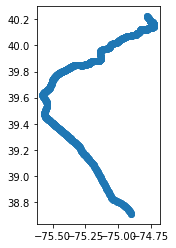

In [343]:
rm_coords_gdf.plot()

In [344]:
coast = gpd.read_file('../../../../../ArcGIS/Projects/DRB/Data/Simplified_coastline_and_buffers/Coastline_DRB.shp')

In [366]:
drb_estuary = gpd.read_file('../../../../../ArcGIS/Projects/DRB/Data/Simplified_coastline_and_buffers/DRB_ocean_estuary.shp')

In [372]:
drb_bounds = gpd.read_file('../../../../../ArcGIS/Projects/DRB/Data/Simplified_DRB_boundaries/DRB_bound.shp')

In [389]:
segments = gpd.read_file('../../../../../ArcGIS/Projects/DRB/Data/Simplified_Network_Shapefiles/seg_subset_simp_smo.shp')
segments = segments.to_crs(coast.crs)

In [385]:
coast.crs

<Projected CRS: PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GE ...>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [360]:
rm_coords_gdf =rm_coords_gdf.to_crs(coast.crs)

(-180000.0, 50000.0)

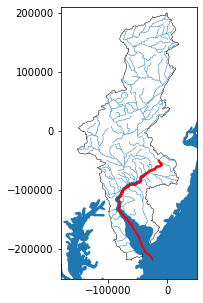

In [395]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()
coast.plot(ax=ax, zorder=0)
segments.plot(ax=ax, linewidth=0.5, zorder=0)
drb_estuary.plot(ax=ax, zorder=0)
drb_bounds.plot(ax=ax, color='black', linewidth=0.5, zorder=0)
rm_coords_gdf.plot(ax=ax, color='red', markersize=0.1, zorder=1)
ax.set_ylim(-250000,210000)
ax.set_xlim(-180000,50000)